# Cadeias de Markov em tempo discreto

Importar as bibliotecas que serão usadas.

In [1]:
import numpy as np

### Exemplo
Paulo está de bom humor (BH), mais ou menos (MM) ou de mau humor (MH). Se ele está BH hoje, então estará BH, MM e MH amanhã, com as seguintes probabilidades: 0,5, 0,4, 0,1. Se ele está MM hoje, então estará BH, MM e MH amanhã com as seguintes probabilidades: 0,3, 0,4, 0,3. se ele está MH hoje, então ele estará BH, MM, e MH com as seguintes probabilidades: 0,2, 03, 0,5. O humor do Pulo pode ser modelado por uma CMTD com a seguinte matriz de transição:

$\mathbf{P} = \begin{bmatrix}0.5 & 0.4 & 0.1\\0.3 & 0.4 & 0.3\\0.2 & 0.3 & 0.5\end{bmatrix}$

a) Calcule a probabilidade de Paulo estar de mau humor hoje e ficar de humor mais ou menos daqui a 3 dias<br>
Dica: A probabilidade desejada estará será uma transição de mau humor (estado 3) para mais ou menos (estado 2) em 3 dias. Ou seja, o valor da probabilidade pode ser encontrado terceira linha da segunda coluna da matriz P elevada à terceira potência.

In [2]:
P = np.array([[0.5, 0.4, 0.1],[0.3, 0.4, 0.3],[0.2, 0.3, 0.5]], dtype=np.float64)
P3 = np.linalg.matrix_power(P,3)
print(P3)
print(P3[2,1])
print('Probabilidade de Paulo estar de mau humor hoje e ficar de humor mais ou menos daqui a 3 dias: {:.4f}'.format(P3[2,1]))

[[0.356 0.378 0.266]
 [0.336 0.37  0.294]
 [0.322 0.364 0.314]]
0.364
Probabilidade de Paulo estar de mau humor hoje e ficar de humor mais ou menos daqui a 3 dias: 0.3640


b) Calcule a matriz A, o vetor B e o vetor PI do regime permanente do humor do Paulo.
Calcular as probabilidades no regime permanente.

In [3]:
A = np.array([[-0.5, 0.3, 0.2], [0.4, -0.6, 0.3], [0.1, 0.3, -0.5], [1, 1, 1]], dtype=np.float64)
B= np.array([0, 0, 0, 1] , dtype=np.float64)

A_pinv = np.linalg.pinv(A)
PI = np.dot(A_pinv,B)
print(PI)

[0.33870968 0.37096774 0.29032258]


## Exercício 1
Implementar uma função cmtdP para calcular o estado permanente de uma cadeia de Markov em tempo discreto.<br>
A função recebe como argumento a matriz de probabilidades de um passo (P)<br><br>
Algoritmo:
* Testa se a matriz está corretamente construída<br>
Matriz quadrada e probabilidades de uma linha tem que somar 1
* Calcula matriz A <br>
n = dimensão de A<br>
A = Transposta(P) - Identidade<br>
A = A concatenada com vetor de 1s de tamanho n (usar np.vstack para concatenar)
* Calcula vetor B <br>
B = vetor de zeros de tamanho n concatenado com [1] (usar np.hstack para concatenar)
* Calcular o vetor PI <br>
Usar a função np.linalg.pinv para calcular PI

In [ ]:
# Função cmtdP
def cmtdP(P):
    [r,c] = P.shape
    if ((r != c) | np.all(np.sum(P, 1) != 1)):
        raise Exception('Matriz P invalida!')

    # Colocar seu código aqui


    return 0

In [8]:

def cmtdP(P):
    [r,c] = P.shape
    if ((r != c) | np.all(np.sum(P, 1) != 1)):
        raise Exception('Matriz P invalida!')

    n = P.shape[0]
    A = P.T - np.identity(n)
    A = np.vstack((A, np.ones(n)))
    B = np.hstack((np.zeros(n), 1))
    PI = np.linalg.pinv(A) @ B

    return PI

Testar seu código com a matriz de transição de um passo do humor do Paulo (P)

In [7]:
A_pinv = np.linalg.pinv(A)
PI = np.dot(A_pinv,B)
print(PI)

[0.33870968 0.37096774 0.29032258]


### Exercício 2
Pedro e Natália formam o casal perfeito, com apenas um probleminha: quem lava a louça hoje? Na maior parte das vezes ambos são voluntários, mas de vez em quando a louça fica para o dia seguinte. A Natália observou que os fatos ocorrem, mais precisamente, da seguinte maneira: (i) Quando não há louça acumulada, Natália e Pedro se apresentam na mesma proporção, mas em uma a cada cinco vezes, a louça fica para o dia seguinte. (ii) Quando a louça está um dia acumulada, Natália se apresenta três vezes mais do que Pedro, mas em uma a cada cinco vezes, a louça fica para o dia seguinte. (iii) Quando a louça está dois dias acumulada, apenas Natália se apresenta, mas em uma a cada cinco vezes, a louça fica para o dia seguinte. (iv) Quando a louça está três dias acumuladas, a Natália sempre se apresenta.<br><br>
Calcular a matriz P e usar a função cmtdP para calcular o vetor de probabilidades do regime permanente.

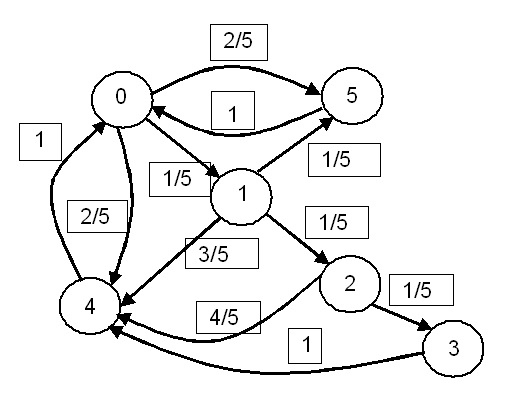

In [9]:
from IPython.display import Image, display
display(Image('/content/CMTD_E3.jpg'))

In [11]:
P = np.array([[0.8, 0.1, 0.1, 0],
              [0.6, 0.2, 0.2, 0],
              [0.8, 0, 0.2, 0],
              [1, 0, 0, 0]],
             dtype=np.float64)

print(P)

print(cmtdP(P))


[[0.8 0.1 0.1 0. ]
 [0.6 0.2 0.2 0. ]
 [0.8 0.  0.2 0. ]
 [1.  0.  0.  0. ]]
[7.80487805e-01 9.75609756e-02 1.21951220e-01 2.19070629e-16]
